# Exemplo Prático: Aprendizagem Supervisionada Classificação PARTE 1

## Classificação de Flores Íris - Comparativo

O objetivo nessa prática é apresentar um passo adiante considerando a primeira prática e mostrar duas funções muito importantes para o trainamento em aprendizagem de máquina. Elas são o 'cross-validation' e o 'comparativo de modelos'.

<div>
<img src="https://raw.githubusercontent.com/rafaelmm82/ufpb-ia-20201/master/03-aprendizagem_supervisionada_classificacao/03_aula_pratica_classificacao_iris_comparativo/01_cross_validation.png", width="640"/>
<div/>

# 1.1) Cross-validation

Carregando e entendendo o conjunto de dados, criando um modelo e aplicando o cross-validation para checar o desempenho em cada sub-conjunto de dados.



In [ ]:
# Carregar e entender os dados

# biblioteca para carregar e realizar operações tabulares
import pandas as pd

# biblioteca para plotar gráficos
import matplotlib.pyplot as plt

# dataset, arquivo com as amostras das medições das flores
arquivo = 'https://raw.githubusercontent.com/rafaelmm82/ufpb-ia-20201/master/02-fundamentos_de_ia/02_aula_pratica_classificacao_iris/iris.csv'

# carregando o conteúdo do arquivo em um objeto pandas.DataFrame
# a partir do método de carregamento de arquivo read_csv
# especificando que a primeira linha contém os nomes do cabeçalho
dataset = pd.read_csv(arquivo, header=0)

# exibindo a dimensão dos dados carregados (linhas, colunas)
print(dataset.shape)

(150, 5)


In [ ]:
# para saber a quantidade dados por classe
print(dataset.groupby('classe').size())

classe
Setosa        50
Versicolor    50
Virginica     50
dtype: int64


In [ ]:
# Seprando os dados e Aplicando Cross-Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

array = dataset.values
X = array[:,0:4]
y = array[:,4]

# separação treino e validação
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

# criando o modelo e aplicando o cross_validation
model = LogisticRegression(solver='liblinear', multi_class='ovr')
cv_results = cross_val_score(model, X_train, Y_train, cv=5, scoring='accuracy')
print('cv_results ', cv_results)

cv_results  [0.875      0.91666667 1.         0.91666667 0.95833333]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

In [ ]:
cv_results.mean()

0.9333333333333332

In [ ]:
cv_results.std()

0.042491829279939886

In [ ]:
# exibindo os resultados individualmente
print(f'{len(cv_results)} treinamentos realizados')

# print por resultado
for valor in cv_results:
  print(f'resultado treino: {valor}')

5 treinamentos realizados
resultado treino: 0.875
resultado treino: 0.9166666666666666
resultado treino: 1.0
resultado treino: 0.9166666666666666
resultado treino: 0.9583333333333334


In [ ]:
# imprimindo a média e desvio padrão
print(f'LR, média{cv_results.mean()} e desvio padrão {cv_results.std()}')

LR, média0.9333333333333332 e desvio padrão 0.042491829279939886


# 1.2) Garantindo a equivalência entre as classes:

Usando o Stratified K-Fold (Cross-validation com extratifcação por classe)


In [ ]:
# Seprando os dados e Aplicando Cross-Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold  # <-- aqui a diferença
from sklearn.linear_model import LogisticRegression

array = dataset.values
X = array[:,0:4]
y = array[:,4]

# separação treino e validação
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

# cria o stratificado
kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)  # <-- aqui a diferença

# criando o modelo e aplicando o cross_validation
model = LogisticRegression(solver='liblinear', multi_class='ovr')
cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')  # <-- aqui a diferença
print('cv_results ', cv_results)

# exibindo os resultados individualmente
print(f'{len(cv_results)} treinamentos realizados')

# print por resultado
for valor in cv_results:
  print(f'resultado treino: {valor}')

# imprimindo a média e desvio padrão
print(f'LR, média{cv_results.mean()} e desvio padrão {cv_results.std()}')

cv_results  [1.         0.95833333 0.875      0.91666667 0.95833333]
5 treinamentos realizados
resultado treino: 1.0
resultado treino: 0.9583333333333334
resultado treino: 0.875
resultado treino: 0.9166666666666666
resultado treino: 0.9583333333333334
LR, média0.9416666666666667 e desvio padrão 0.042491829279939886


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

# 2) Comparando Resultados

Refazendo o procedimento, porém aplicando diferentes modelos para comparar seus resultados individuais.



In [ ]:
# carregando todos os modelos e funções necessárias
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# carregando os modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


In [ ]:
# dividindo os conjuntos aleatoriamente
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=True)

# criando os modelos e adicionando num vetor de tuplas pra facilitar o código
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('NB', GaussianNB()))

# avaliando cada um dos modelos utilizando cross-validation com stratified
results = []
names = []

for name, model in models:
	kfold = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('modelo %s: média %f desvio(%f)' % (name, cv_results.mean(), cv_results.std()))

modelo LR: média 0.941667 desvio(0.042492)
modelo KNN: média 0.958333 desvio(0.045644)
modelo SVM: média 0.983333 desvio(0.020412)
modelo CART: média 0.966667 desvio(0.031180)
modelo LDA: média 0.975000 desvio(0.020412)
modelo NB: média 0.950000 desvio(0.031180)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was depre

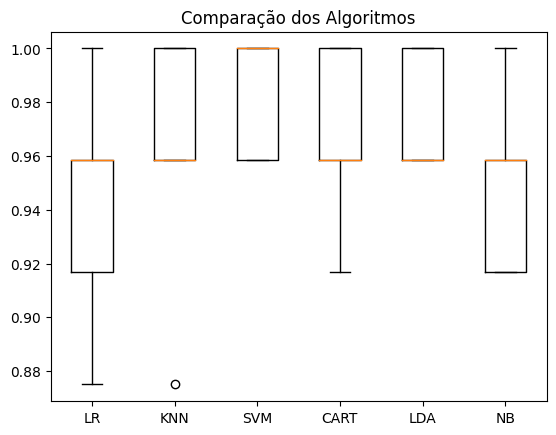

In [ ]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Comparação dos Algoritmos')
plt.show()

In [ ]:
# exibindo os resultados gerais
for result in results:
  print(result)

[1.         0.95833333 0.875      0.91666667 0.95833333]
[0.95833333 1.         0.875      1.         0.95833333]
[1.         1.         0.95833333 1.         0.95833333]
[1.         0.95833333 0.91666667 1.         0.95833333]
[1.         0.95833333 0.95833333 1.         0.95833333]
[0.95833333 0.95833333 0.91666667 1.         0.91666667]
